In [1]:
# Import dependencies

from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit Mars temp data URl
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

browser.is_element_present_by_css('div.list_text', wait_time=1)

False

In [4]:
# Scrape data using Pandas read_html method
pd_mars_df = pd.read_html(url)[0]

In [5]:
# Assemble scraped data into a df
pd_mars_df.head

<bound method NDFrame.head of         id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]>

In [6]:
# Examine the data types of all the DF columns
pd_mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [7]:
# Convert data types to appropriate types
pd_mars_df['terrestrial_date'] = pd.to_datetime(pd_mars_df['terrestrial_date'])
pd_mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [8]:
# How many months exist on Mars?
mars_months = np.unique(pd_mars_df['month'])
mars_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [9]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
print(pd_mars_df['sol'].agg(['min', 'max']))
sol_range = pd_mars_df['sol'].max() - pd_mars_df['sol'].min()

min      10
max    1977
Name: sol, dtype: int64


In [10]:
# What are the coldest and the warmest months on Mars?
min_temp_df = pd_mars_df.groupby('month', as_index=False).min().sort_values('min_temp')
min_temp_df

,month,id,terrestrial_date,sol,ls,min_temp,pressure
2,3,421,2013-12-09,477,60,-90.0,833.0
3,4,487,2014-02-16,544,90,-89.0,754.0
1,2,371,2013-10-03,412,30,-86.0,867.0
4,5,552,2014-04-23,609,120,-85.0,727.0
5,6,2,2012-08-16,10,150,-84.0,732.0
0,1,319,2013-08-01,351,0,-82.0,820.0
9,10,107,2013-02-24,197,270,-81.0,862.0
11,12,263,2013-06-05,295,330,-81.0,829.0
6,7,3,2012-09-30,54,180,-78.0,751.0
8,9,59,2013-01-08,151,240,-78.0,896.0


In [11]:
# # What are the coldest and the warmest months on Mars?
max_temp_df = pd_mars_df.groupby('month', as_index=False).max().sort_values('min_temp')
max_temp_df

,month,id,terrestrial_date,sol,ls,min_temp,pressure
2,3,1798,2017-11-19,1880,89,-77.0,907.0
3,4,1863,2018-01-25,1945,119,-77.0,857.0
1,2,1732,2017-09-12,1814,59,-76.0,908.0
4,5,1895,2018-02-27,1977,149,-74.0,777.0
5,6,1317,2016-07-02,1388,179,-71.0,764.0
11,12,1608,2017-05-05,1687,359,-70.0,853.0
10,11,1551,2017-03-08,1631,329,-67.0,879.0
9,10,1501,2017-01-16,1581,299,-66.0,917.0
6,7,1360,2016-08-24,1440,209,-65.0,836.0
7,8,1407,2016-10-11,1487,239,-63.0,914.0


<AxesSubplot:xlabel='month'>

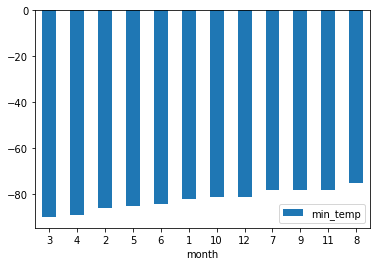

In [12]:
min_temp_df.plot.bar(x='month', y='min_temp', rot=0)

<AxesSubplot:xlabel='month'>

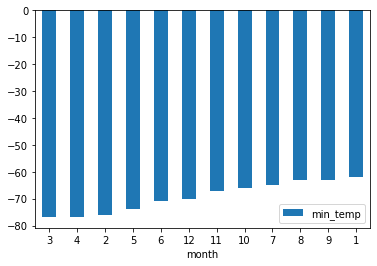

In [13]:
max_temp_df.plot.bar(x='month', y='min_temp', rot=0)

In [14]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
atmosphere_pressure_df = pd_mars_df.groupby('month', as_index=False).mean().sort_values('pressure')
atmosphere_pressure_df

,month,id,sol,ls,min_temp,pressure
5,6,735.306122,750.829932,164.897959,-75.299320,745.054422
4,5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,7,714.549296,715.105634,194.894366,-72.281690,795.105634
3,4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
11,12,931.602410,990.951807,344.692771,-74.451807,842.156627
10,11,874.246377,947.224638,314.536232,-71.985507,857.014493
0,1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
7,8,718.078014,795.333333,224.347518,-68.382979,873.829787
2,3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
9,10,955.723214,1034.669643,286.330357,-71.982143,887.312500


<AxesSubplot:xlabel='month'>

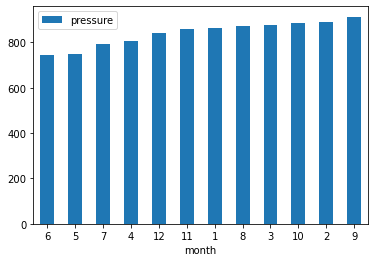

In [15]:
atmosphere_pressure_df.plot.bar(x='month', y='pressure', rot=0)

In [16]:
# Export the DataFrame to a CSV file.
file_name = './mars_data.csv'
pd_mars_df.to_csv(file_name, index=False)

In [17]:
browser.quit()